# API Request



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
from MCForecastTools import MCSimulation

%matplotlib inline

#### Step 1: Set the .env file to store the secret keys codes.

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [3]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify Alpaca key and Secret key were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [4]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["CEI"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
start = pd.Timestamp("2011-10-1", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-1", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `CEI` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [5]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Review the first 5 rows of the Alpaca DataFrame
display(df_ticker.head(5))
display(df_ticker.tail(5))

CEI                                     
                             open      high       low   close   volume
time                                                                  
2021-05-12 00:00:00-04:00  0.6230  0.679300  0.617700  0.6249  6707073
2021-05-13 00:00:00-04:00  0.6230  0.640000  0.565501  0.5940  3921119
2021-05-14 00:00:00-04:00  0.5877  0.613500  0.587700  0.6021  2420626
2021-05-17 00:00:00-04:00  0.6050  0.643899  0.590000  0.6352  3564665
2021-05-18 00:00:00-04:00  0.6400  0.665000  0.640000  0.6460  2210946

CEI                               
                           open  high   low   close     volume
time                                                          
2021-09-27 00:00:00-04:00  2.26  2.80  2.21  2.7100  320293249
2021-09-28 00:00:00-04:00  2.88  3.44  2.62  3.2200  707453338
2021-09-29 00:00:00-04:00  3.06  4.85  2.89  3.4001  913011181
2021-09-30 00:00:00-04:00  4.13  4.37  3.44  3.7900  418855866
2021-10-01 00:00:00-04:00  3.49  3.54  2.86  3.1199  217773171

In [6]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of CEI
df_closing_prices["CEI"] = df_ticker["CEI"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,CEI
2021-05-13,-0.049448
2021-05-14,0.013636
2021-05-17,0.054974
2021-05-18,0.017003
2021-05-19,-0.047523
2021-05-20,0.003413
2021-05-21,0.013767
2021-05-24,-0.024924
2021-05-25,-0.072096
2021-05-26,0.059686


In [7]:
# Generate descriptive statistics
df_daily_returns.describe()

,CEI
count,99.000000
mean,0.020228
std,0.091912
min,-0.176807
25%,-0.044709
50%,0.009380
75%,0.055189
max,0.334975


<AxesSubplot:ylabel='Frequency'>

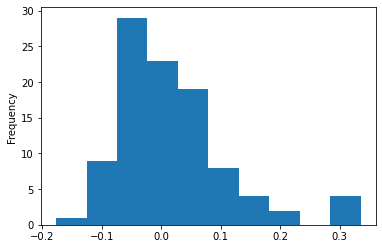

In [8]:
# Visualize distribution of IBM percent change in closing price using a histogram plot
df_daily_returns["CEI"].plot.hist()

<AxesSubplot:ylabel='Density'>

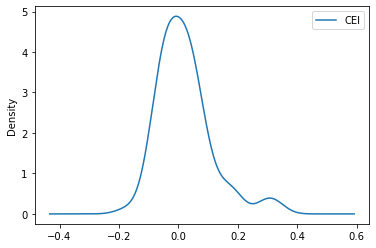

In [9]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
df_daily_returns.plot.density()

#### Step 4: Run a Monte Carlo simulation of 500 samples for a year, and then plot the results.

In [10]:
# Configure the Monte Carlo simulation to forecast cumulative returns for the next 252 days
# Run 500 samples.
MC_CEI = MCSimulation(
    portfolio_data = df_ticker,
    num_simulation = 500,
    num_trading_days = 252
)

# Review the simulation input data
MC_CEI.portfolio_data.head()


CEI                                       \
                             open      high       low   close   volume   
time                                                                     
2021-05-12 00:00:00-04:00  0.6230  0.679300  0.617700  0.6249  6707073   
2021-05-13 00:00:00-04:00  0.6230  0.640000  0.565501  0.5940  3921119   
2021-05-14 00:00:00-04:00  0.5877  0.613500  0.587700  0.6021  2420626   
2021-05-17 00:00:00-04:00  0.6050  0.643899  0.590000  0.6352  3564665   
2021-05-18 00:00:00-04:00  0.6400  0.665000  0.640000  0.6460  2210946   

                                        
                          daily_return  
time                                    
2021-05-12 00:00:00-04:00          NaN  
2021-05-13 00:00:00-04:00    -0.049448  
2021-05-14 00:00:00-04:00     0.013636  
2021-05-17 00:00:00-04:00     0.054974  
2021-05-18 00:00:00-04:00     0.017003

In [11]:
# Run the Monte Carlo simulation to forecast next year cumulative returns
MC_CEI.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.074565,1.115451,1.129676,0.999596,1.025567,1.094781,1.081715,0.893143,0.944132,0.931519,...,0.875356,1.051665,1.091926,0.993070,1.084331,0.958913,0.942018,1.115384,1.013123,1.167154
2,1.098562,1.153702,1.209655,1.020260,0.870638,1.091106,1.170135,0.861338,1.083594,0.868074,...,0.960248,1.162706,1.074180,1.114036,0.947082,0.954642,0.967103,1.145285,1.069127,1.169813
3,1.041301,1.155934,1.312880,1.108962,0.858247,1.211776,1.088841,0.916033,1.092319,0.910373,...,0.958086,1.151210,1.049602,1.026390,0.779330,0.950729,1.071161,1.301758,1.108753,1.082626
4,1.080058,1.263990,1.370423,1.067873,0.830950,1.003215,1.107480,1.148305,1.124949,0.822640,...,0.935746,1.105773,1.100805,1.158278,0.828993,0.873881,0.944481,1.312191,1.157732,1.027984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2.862974,5.442451,101.880209,539.994079,88.512209,134.271664,12.419241,42.450749,10.024553,179.490090,...,20.077286,128.651068,9.482715,83.860023,10.684498,103.743468,1135.071840,59.651816,75.072917,185.499186
249,3.482960,5.936460,103.156855,484.154923,93.355288,131.993306,13.242591,39.404309,10.487306,165.944808,...,20.260110,130.383519,9.348388,90.883538,11.533094,104.234343,1223.404766,61.506755,84.008602,175.648738
250,3.157650,5.378758,89.516605,548.965539,95.245085,149.833029,11.261954,42.995535,10.503990,172.087736,...,23.143822,158.648106,9.949208,88.782248,10.808075,111.207934,1168.199608,64.925779,75.564385,165.813790
251,3.038288,5.741476,84.964570,494.892199,109.331940,152.546644,11.833193,51.153449,11.532291,188.545654,...,25.971353,155.065737,10.794571,91.618042,10.479112,125.403648,1147.168493,54.657383,74.907017,200.788415


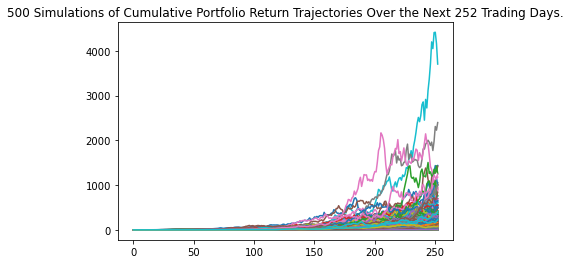

In [12]:
# Visualize the Monte Carlo simulation
MC_sim_line_plot = MC_CEI.plot_simulation()


In [13]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_CEI.simulated_return.mean(axis=1)),
    "median": list(MC_CEI.simulated_return.median(axis=1)),
    "min": list(MC_CEI.simulated_return.min(axis=1)),
    "max": list(MC_CEI.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.021497,1.022498,0.760246,1.320375
2,1.041589,1.041728,0.700034,1.454544
3,1.052437,1.053002,0.667090,1.591084
4,1.071227,1.063656,0.540917,1.676108


<AxesSubplot:title={'center':'Daily Returns Trajectory of CEI Stock Over the Next Year'}>

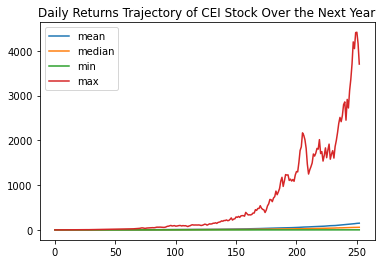

In [14]:
# Plot the trajectory of CEI stock daily returns
df_simulated_returns.plot(title="Daily Returns Trajectory of CEI Stock Over the Next Year")

#### Step 5: Plot the probability distribution of the Monte Carlo simulation.

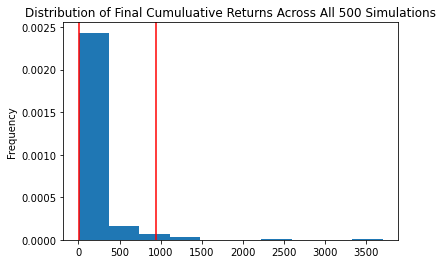

In [15]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_CEI.plot_distribution()


#### Step 6: Generate the summary statistics for the Monte Carlo simulation.

In [16]:
# Generate summary statistics from the 1 year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_CEI.summarize_cumulative_return()


# Review the 1 year Monte Carlo summary statistics
print(MC_summary_statistics)

count            500.000000
mean             150.339037
std              286.370142
min                1.723616
25%               22.777118
50%               58.447454
75%              149.649061
max             3701.447160
95% CI Lower       3.595885
95% CI Upper     944.314826
Name: 252, dtype: float64
